In [1]:
import numpy as np 
import pandas as pd

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
# iris

In [4]:
data = iris['data'] # dropping the class variable

In [5]:
iris_class = iris['target']
iris_class 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# PCA 
from sklearn.decomposition import PCA

In [7]:
pca = PCA()
pca.fit(data)
X = pca.transform(data)

In [8]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [-0.31548719,  0.3197231 ,  0.47983899, -0.75365743]])

In [9]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [10]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [16]:
pd.DataFrame(X)

,0,1,2,3
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259
...,...,...,...,...
145,1.944110,0.187532,0.177825,-0.426196
146,1.527167,-0.375317,-0.121898,-0.254367
147,1.764346,0.078859,0.130482,-0.137001
148,1.900942,0.116628,0.723252,-0.044595


# image compression using SVD

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import *
%matplotlib inline

In [20]:
image_path = "/content/yann_lecun.jpg" #import image path


In [22]:
img = Image.open(image_path)

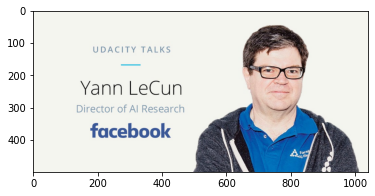

In [23]:
plt.imshow(img)

In [24]:
img.size

(1040, 500)

In [25]:
np.array(img).shape

(500, 1040, 3)

In [26]:
img_gray = img.convert("L")

In [27]:
img_array = np.array(img_gray)

In [28]:
img_array.shape

(500, 1040)

In [29]:
U, sigma, V = np.linalg.svd(img_array)

In [30]:
print("First 10 singular values: \n \n", sigma[:10])

First 10 singular values: 
 
 [153477.56323301  24163.24340087  15030.98969022  10379.37710935
   8898.64302424   7380.05103586   6345.42297077   5745.86591845
   5278.39883795   4874.17761667]


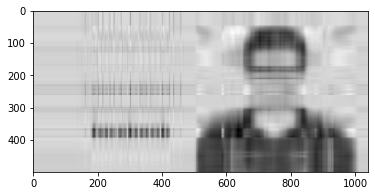

In [31]:
i = 5
reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
plt.imshow(reconstimg, cmap='gray');

In [32]:
np.diag(sigma[:i])

array([[153477.56323301,      0.        ,      0.        ,
             0.        ,      0.        ],
       [     0.        ,  24163.24340087,      0.        ,
             0.        ,      0.        ],
       [     0.        ,      0.        ,  15030.98969022,
             0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        ,
         10379.37710935,      0.        ],
       [     0.        ,      0.        ,      0.        ,
             0.        ,   8898.64302424]])

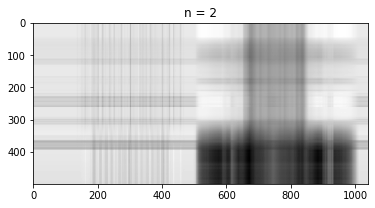

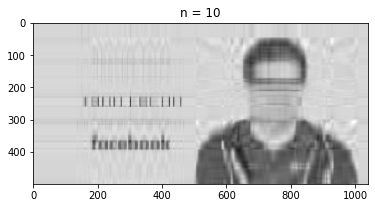

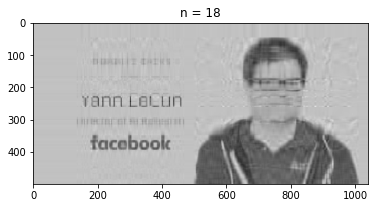

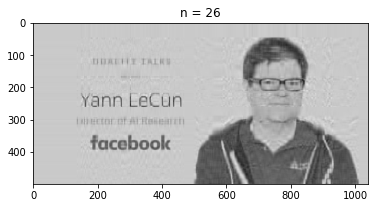

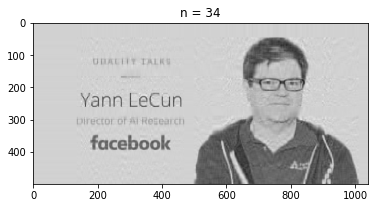

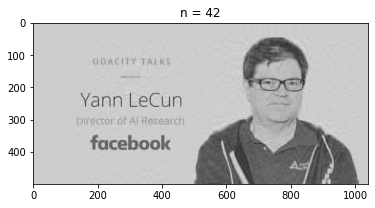

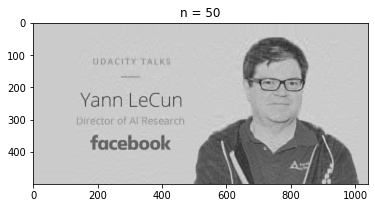

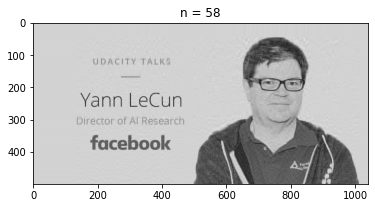

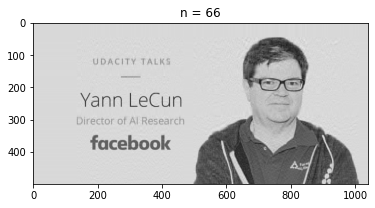

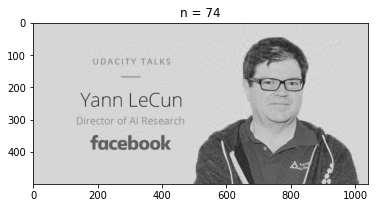

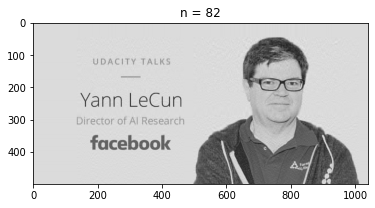

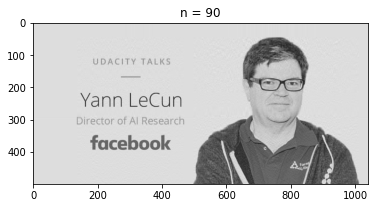

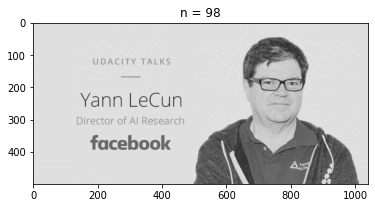

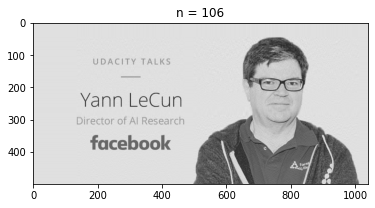

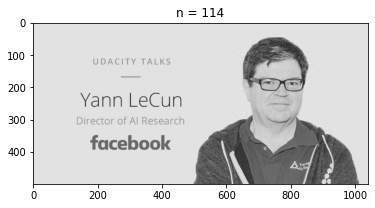

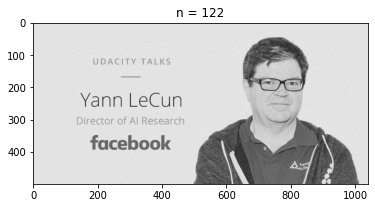

In [33]:
for i in range(2, 130, 8):
    reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    reconstimg.shape
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [34]:
img_array.shape

(500, 1040)

In [35]:
org_img = np.prod(img_array.shape[0:])
print("full representationo of the image:  ", org_img )

full representationo of the image:   520000


In [36]:
svd_recon_img = 34* 500 + 34 + 34* 1040
print("reconstructed image full representation:  ", svd_recon_img)

reconstructed image full representation:   52394


In [37]:
svd_recon_img /org_img 

0.10075769230769231

Text(0.5, 1.0, 'Cumulative Sum of Sigma Matrix')

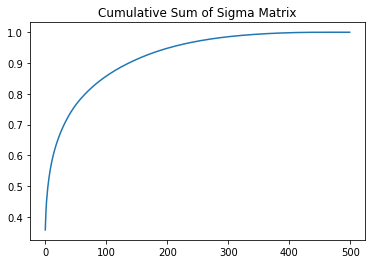

In [38]:
plt.plot(np.cumsum(sigma)/np.sum(sigma))
plt.title('Cumulative Sum of Sigma Matrix')